income
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64
The score of the random forest classifier with default parameters is: 0.8208
The best accuracy for the train set is 0.8345 and it occurs with the depth 12.
The best accuracy for the test set is 0.8606 and it occurs with the depth 25.


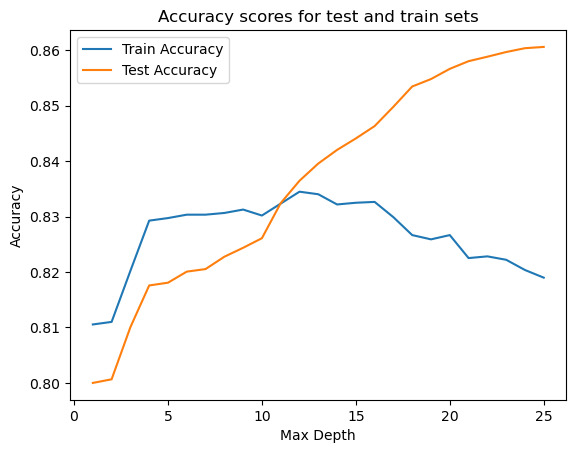

Top 5 random forest features:
          feature  importance
0             age    0.313779
1    capital-gain    0.289580
3  hours-per-week    0.195067
2    capital-loss    0.117805
4        sex_Male    0.061320
The best accuracy for the new test set is 0.8862 and it occurs with the depth 25.


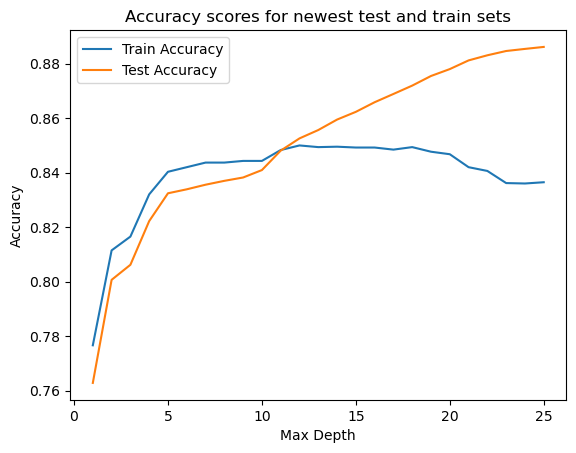

Top 5 new random forest features:
                       New feature  importance
0                              age    0.302365
1                     capital-gain    0.232326
3                   hours-per-week    0.179160
2                     capital-loss    0.088537
10  education_bin_Masters and more    0.082933


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult_data.csv', header=None, names = col_names)
#print(df.dtypes)

#Distribution of income
print(df['income'].value_counts(normalize='True'))


#Clean columns by stripping extra whitespace for columns of type "object"
for i in col_names:
    if df[i].dtypes == object:
        df[i] = df[i].str.strip()


#Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
X = pd.get_dummies(df[feature_cols],drop_first=True)

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
y = np.where(df.income=='<=50K',0,1)

#Split data into a train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size=0.2)

#Instantiate random forest classifier, fit and score with default parameters
clas = RandomForestClassifier()
clas.fit(x_train,y_train)
print('The score of the random forest classifier with default parameters is: {}'
      .format(np.round(clas.score(x_test,y_test),4)))

#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
np.random.seed(0)
max_depths = []
accuracy_train=[]
accuracy_test = []
for i in range(1,26):
    clas1 = RandomForestClassifier(max_depth=i)
    clas1.fit(x_train,y_train)
    y_pred = clas1.predict(x_test)
    y_ptrain = clas1.predict(x_train)
    accuracy_train.append(accuracy_score(y_test,y_pred))
    accuracy_test.append(accuracy_score(y_train,y_ptrain))
    max_depths.append(i)
    
#Find the best accuracy and at what depth that occurs
print('The best accuracy for the train set is {} and it occurs when depth is {}.'
      .format(np.round(np.max(accuracy_train),4),np.argmax(accuracy_train)+1))
print('The best accuracy for the test set is {} and it occurs when depth is {}.'
      .format(np.round(np.max(accuracy_test),4),np.argmax(accuracy_test)+1))

#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(max_depths,accuracy_train)
plt.plot(max_depths,accuracy_test)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy scores for test and train sets')
plt.show()


#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth=np.argmax(accuracy_test)+1)
best_rf.fit(x_train,y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),
                              columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])


#Create two new features, based on education and native country
education_bin = ['High school and less','College to Bachelors','Masters and more']
df['education_bin']=pd.cut(df['education-num'],[0,9,13,16],labels=education_bin)
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

#Use these two new additional features and recreate X and test/train split
X=pd.get_dummies(df[feature_cols],drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size=0.2)

#Find the best max depth now with the additional two features
np.random.seed(0)
max_depths1 = []
accuracy_train1=[]
accuracy_test1 = []
for i in range(1,26):
    clas2 = RandomForestClassifier(max_depth=i)
    clas2.fit(x_train,y_train)
    y_predi = clas2.predict(x_test)
    y_prtrain = clas2.predict(x_train)
    accuracy_train1.append(accuracy_score(y_test,y_predi))
    accuracy_test1.append(accuracy_score(y_train,y_prtrain))
    max_depths1.append(i)

print('The best accuracy for the new test set is {} and it occurs when depth is {}.'
      .format(np.round(np.max(accuracy_test1),4),np.argmax(accuracy_test1)+1))

plt.plot(max_depths1,accuracy_train1)
plt.plot(max_depths1,accuracy_test1)
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy scores for newest test and train sets')
plt.show()

#Save the best model and print the two features with the new feature set
best_model = RandomForestClassifier(max_depth=np.argmax(accuracy_test1)+1)
best_model.fit(x_train,y_train)
feature_imp_model = pd.DataFrame(zip(x_train.columns, best_model.feature_importances_),
                              columns=['New feature', 'importance'])
print('Top 5 new random forest features:')
print(feature_imp_model.sort_values('importance', ascending=False).iloc[0:5])

